In [1]:
# required imports

import numpy as np
import collections
import pandas as pd
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

sns.set_style('whitegrid')

In [2]:
# load and preview dataset

dataset = pd.read_csv('turkiye-student-evaluation_generic.csv')
dataset.head()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,1,2,1,0,4,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,1,2,1,2,4,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
3,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
4,1,2,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [3]:
# summary

dataset.describe()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
count,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,...,5820.000000,5820.000000,5820.000000,5820.000000,5820.00000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000
mean,2.485567,7.276289,1.214089,1.675601,2.783505,2.929897,3.073883,3.178694,3.082474,3.105842,...,3.261684,3.285395,3.307388,3.317526,3.20189,3.166838,3.312543,3.222165,3.154811,3.308076
std,0.718473,3.688175,0.532376,1.474975,1.348987,1.341077,1.285251,1.253567,1.284594,1.278989,...,1.268442,1.276848,1.269974,1.268358,1.27259,1.275909,1.257286,1.270695,1.291872,1.278709
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,4.000000,1.000000,0.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,3.000000,3.000000,3.000000,3.000000,2.00000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,3.000000,7.000000,1.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,3.000000,10.000000,1.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000
max,3.000000,13.000000,3.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000


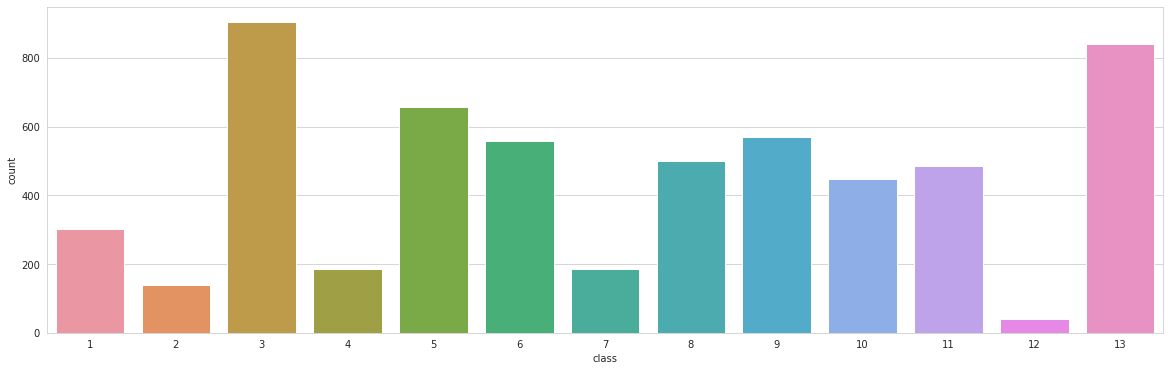

In [4]:
# To Understand for which course the students have given the most responses
# Looks like its Course 3 from below graph

plt.figure(figsize=(20, 6))
sns.countplot(x='class', data=dataset)

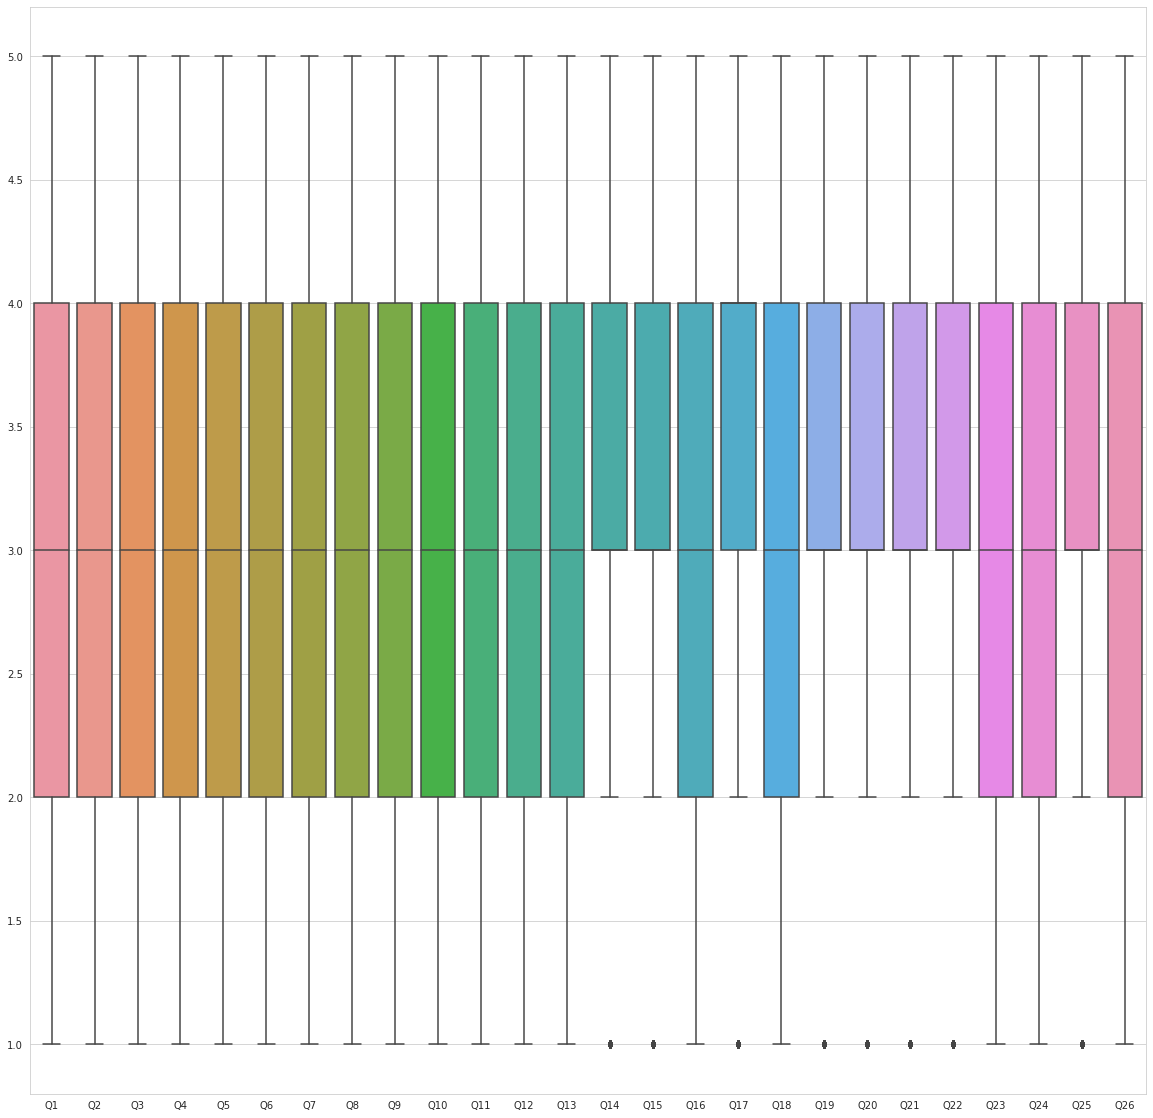

In [5]:
# Visualize how the rating has been given by student for each questions

plt.figure(figsize=(20, 20))
sns.boxplot(data=dataset.iloc[:,5:31 ]);

#### We can see that very few students have given completely disagree (Rating 1) for Question Q14, Q15, Q17, Q19 - Q22, Q25

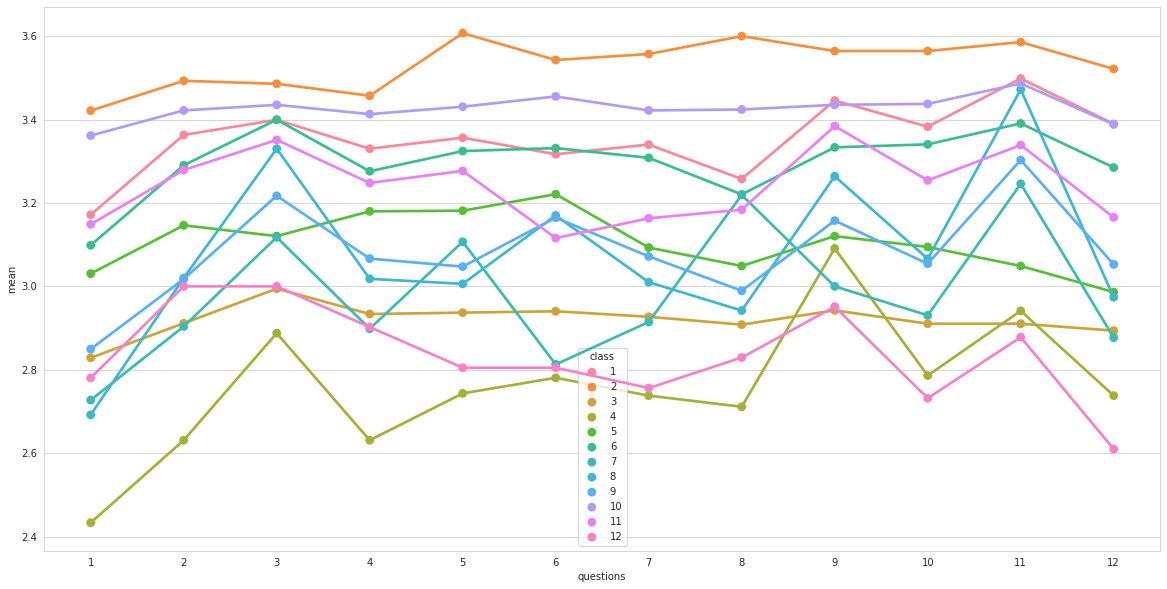

In [6]:
# Visualize the students feedback for questions related to class

# Create a dataframee with 3 columns class, questions and questions mean rating to visualize the final analysis
totalplotdata = pd.DataFrame(columns=['class','questions', 'mean'])

# A list corresponding to the first 12 questions related to the course
# This will be the second column of our new dataframe
questions = list(range(1, 13))

# Loop through all 12 classes
for class_num in range(1, 13):
    
    # Get features for current class
    class_data = dataset[(dataset["class"]==class_num)]
    
    # Lists for the remaining two columns of our new dataframe
    questionmeans = []
    classlist = []
            
    # Column Wise Average of question ratings (related to the course only) for current class
    # which are from Q1 to Q12 i.e. column 5 to column 16 in the dataframe
    for col in range(5, 17):
        questionmeans.append(class_data.iloc[:,col].mean())
        
    # List of current class having 12 elements (each for one question)
    classlist += 12 * [class_num] 

    # print(list(zip(classlist, questions, questionmeans)))
    # Create a plotdata Dataframe and append it to the final Dataframe
    plotdata = pd.DataFrame(list(zip(classlist, questions, questionmeans)), columns=['class','questions', 'mean'])
    totalplotdata = totalplotdata.append(plotdata, ignore_index=True)
    
plt.figure(figsize=(20, 10))
sns.pointplot(x="questions", y="mean", data=totalplotdata, hue="class")

#### We can see that we have best ratings from Class 2 and worst rateing from class 4 students

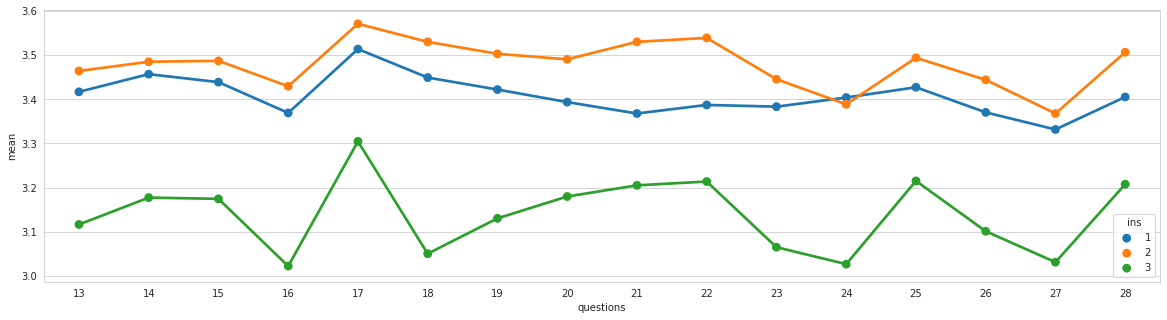

In [7]:
# Visualize the students feedback for questions related to the instructor

# A list corresponding to the last 15 questions related to the instructor
# This will be the second column of our new dataframe
questions = list(range(13,29))

# Create a dataframee with 3 columns class, questions and questions mean rating to visualize the final analysis
totalplotdata = pd.DataFrame(columns=['ins','questions', 'mean'])

# Loop through all 3 instructors
for ins_num in range(1, 4):
    
    # Get features for current instructor
    ins_data = dataset[(dataset["instr"]==ins_num)]
    
    # Lists for the remaining two columns of our new dataframe
    questionmeans = []
    inslist = []
    
    # Column Wise Average of question ratings (related to the instructor only) for current instructor
    # which are from Q13 to Q28 i.e. column 17 to column 32 in the dataframe
    for col in range(17,33):
        questionmeans.append(ins_data.iloc[:,col].mean())
    
    # List of current instructor having 16 elements (each for one question)
    inslist += 16 * [ins_num]
    
    # Create a plotdata Dataframe and append it to the final Dataframe
    plotdata = pd.DataFrame(list(zip(inslist,questions,questionmeans)), columns=['ins','questions', 'mean'])
    totalplotdata = totalplotdata.append(plotdata, ignore_index=True)

plt.figure(figsize=(20, 5))
sns.pointplot(x="questions", y="mean", data=totalplotdata, hue="ins")

We can deduce that Instructor 1 and 2 are performing well, but Instructor 3 got bad ratings.

Let's explore which course instructor 3 teaches

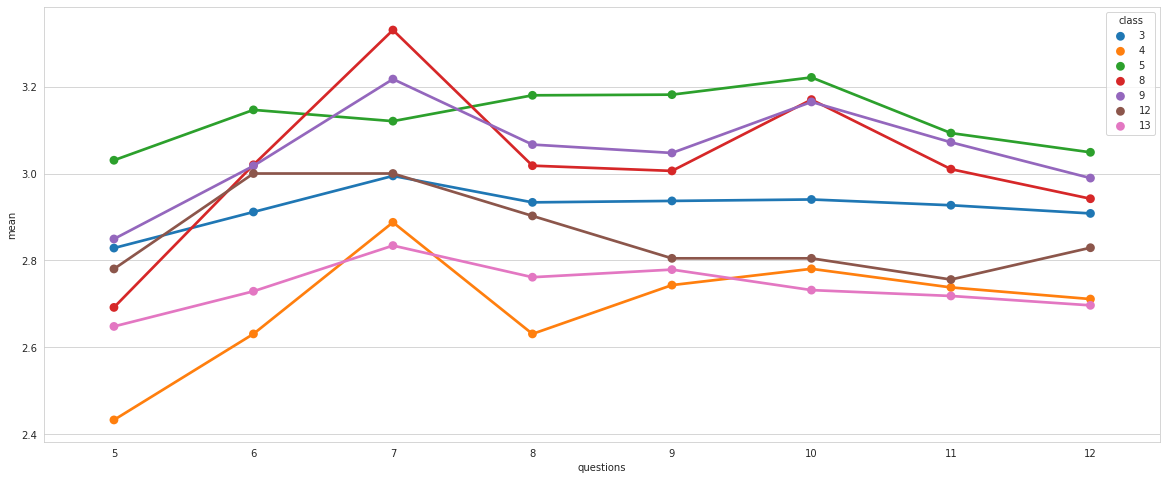

In [8]:
# Get features for instructor 3 only in a Dataframe
dataset_inst3 = dataset[dataset['instr']==3]

# A list of classes taught by instructor 3
class_array_for_inst3 = dataset_inst3["class"].unique().tolist()

# A list corresponding to 12 course related questions
questions = list(range(5, 13))

# Create a dataframee with 3 columns class, questions and questions mean rating to visualize the final analysis
totalplotdata = pd.DataFrame(columns=['class', 'questions', 'mean'])

# Loop through the classes taught by instructor 3
for class_num in class_array_for_inst3:
    
    # Get features for current class
    class_data = dataset_inst3[(dataset_inst3["class"]==class_num)]
    
    # Lists for the remaining two columns of our new dataframe
    questionmeans = []
    classlist = []
    
    # Column Wise Average of question ratings (related to the course only) for current class and instructor 3
    # which are from Q1 to Q12 i.e. column 5 to column 16 in the dataframe
    for col in range(5, 17):
        questionmeans.append(class_data.iloc[:, col].mean())
    
    # List of current class having 12 elements (each for one question)
    classlist += 12 * [class_num]
    
    # Create a plotdata Dataframe and append it to the final Dataframe
    plotdata = pd.DataFrame(list(zip(classlist,questions,questionmeans)), columns=['class','questions', 'mean'])
    totalplotdata = totalplotdata.append(plotdata, ignore_index=True)

plt.figure(figsize=(20, 8))
sns.pointplot(x='questions', y='mean', data=totalplotdata, hue='class')

 Course 4 and 13 look bad

#### Lets begin to cluster the students based on the questionaire data

In [9]:
# Dataset of questions

dataset_questions = dataset.iloc[:,5:33]
dataset_questions.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
3,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [10]:
# lets do a PCA for dimensional reduction

from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
dataset_questions_pca = pca.fit_transform(dataset_questions)

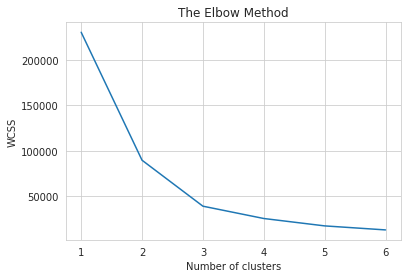

In [11]:
# We use 1 to 7 clusters and see the elbow curve to select the number of clusters

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 7):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(dataset_questions_pca)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 7), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # within cluster sum of squares --> WCSS
plt.show()

Based on the Elbow graph , we can go for 3 clusters

In [12]:
# K-means with 3 clusters

kmeans = KMeans(n_clusters = 3, init = 'k-means++')
y_kmeans = kmeans.fit_predict(dataset_questions_pca)

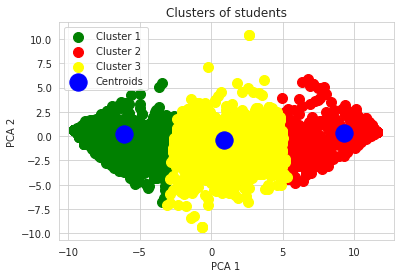

In [13]:
# Plot the clusters

plt.scatter(dataset_questions_pca[y_kmeans == 0, 0], dataset_questions_pca[y_kmeans == 0, 1], s = 100, c = 'green', label = 'Cluster 1')
plt.scatter(dataset_questions_pca[y_kmeans == 1, 0], dataset_questions_pca[y_kmeans == 1, 1], s = 100, c = 'red', label = 'Cluster 2')
plt.scatter(dataset_questions_pca[y_kmeans == 2, 0], dataset_questions_pca[y_kmeans == 2, 1], s = 100, c = 'yellow', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'blue', label = 'Centroids')
plt.title('Clusters of students')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()

#### The plot says that we have 3 clusters of students that can be regarded as those who gave Negative, Neutral and Positive feedback

In [14]:
# Let's count the students in each cluster

collections.Counter(y_kmeans)

Counter({2: 2358, 0: 2222, 1: 1240})

We have 2358 students with negative feedback, 2222 students with positive feedback and 1240 students with a nuetral response

#### We can also use the dendo gram to find the optimal number of clusters in hierarchical clustering

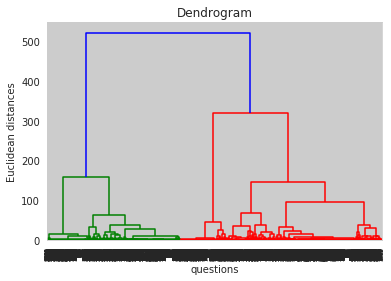

In [15]:
# Visualize Dendogram to decide the number of features

dendrogram = sch.dendrogram(sch.linkage(dataset_questions_pca, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('questions')
plt.ylabel('Euclidean distances')
plt.show()

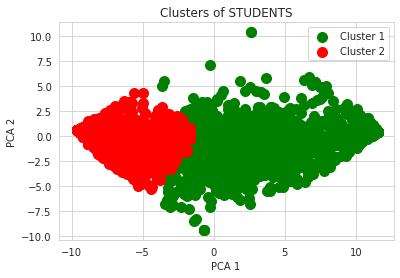

In [16]:
# Using Hierarchical Clustering

hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(dataset_questions_pca)
X = dataset_questions_pca

# Visualising the clusters

plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'green', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'red', label = 'Cluster 2')
plt.title('Clusters of STUDENTS')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()

In [17]:
# Let's count the students in each cluster

collections.Counter(y_hc)

Counter({0: 3502, 1: 2318})

In [18]:
# Using PCA

PCA1 = dataset_questions_pca[:,0]
PCA2 = dataset_questions_pca[:,1]

dataset['PCA1'] = PCA1
dataset['PCA2'] = PCA2

dataset = dataset.drop(dataset.iloc[:,5:33], axis=1)
dataset.head()

,instr,class,nb.repeat,attendance,difficulty,PCA1,PCA2
0,1,2,1,0,4,0.989015,0.522798
1,1,2,1,1,3,0.989015,0.522798
2,1,2,1,2,4,-9.591289,0.640802
3,1,2,1,1,3,0.989015,0.522798
4,1,2,1,0,1,11.569319,0.404794


In [19]:
# Add lables columns as the cluster number to be used as target column

dataset['label'] = kmeans.labels_
X = dataset.drop(['label'], axis=1)
y = dataset['label']

In [20]:
# Train test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [21]:
# implement Random Forest

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [22]:
# Model Evaluation

y_pred = rfc.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       658
           1       1.00      1.00      1.00       375
           2       0.99      1.00      0.99       713

    accuracy                           0.99      1746
   macro avg       1.00      1.00      1.00      1746
weighted avg       0.99      0.99      0.99      1746



##### Looks like the clustering followed by classification works pretty well